In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Input
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ConvNeXtSmall,ConvNeXtTiny

In [2]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/euro-sat-dl-proj/2750", 
    batch_size=16, 
    image_size=(64, 64), 
    validation_split=0.3, 
    subset="training", 
    seed=42
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/euro-sat-dl-proj/2750", 
    batch_size=16, 
    image_size=(64,64), 
    validation_split=0.3, 
    subset="validation", 
    seed=42
)

Found 27000 files belonging to 10 classes.
Using 18900 files for training.
Found 27000 files belonging to 10 classes.
Using 8100 files for validation.


In [3]:
conv=ConvNeXtSmall(input_shape=(64,64,3),include_top=False,weights="imagenet")


198551472/198551472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model=Sequential([
    conv,
    Flatten(),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
])

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
history=model.fit(train_data,epochs=5,validation_data=val_data,batch_size=16)


Epoch 1/5


I0000 00:00:1728988457.927673      77 service.cc:145] XLA service 0x7d9a9c0ef5c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728988457.927728      77 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728988457.927731      77 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1728988489.196665     140 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_12', 1752 bytes spill stores, 1756 bytes spill loads

I0000 00:00:1728988490.441854     142 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_78', 2468 bytes spill stores, 2468 bytes spill loads

I0000 00:00:1728988490.917407     141 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_138', 3976 bytes spill stores, 7104 bytes spill loads



   1/1182 ━━━━━━━━━━━━━━━━━━━━ 33:39:30 103s/step - accuracy: 0.1250 - loss: 2.8358

I0000 00:00:1728988511.935134      77 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_83', 160 bytes spill stores, 160 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_80', 160 bytes spill stores, 160 bytes spill loads

I0000 00:00:1728988511.993183      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1181/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7820 - loss: 0.6966

I0000 00:00:1728988598.353287     213 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_138', 3976 bytes spill stores, 7104 bytes spill loads



1182/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7821 - loss: 0.6964

I0000 00:00:1728988614.614116      76 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_86', 160 bytes spill stores, 160 bytes spill loads



1182/1182 ━━━━━━━━━━━━━━━━━━━━ 219s 99ms/step - accuracy: 0.7822 - loss: 0.6962 - val_accuracy: 0.9443 - val_loss: 0.1779
Epoch 2/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 68s 57ms/step - accuracy: 0.9353 - loss: 0.2189 - val_accuracy: 0.9109 - val_loss: 0.2681
Epoch 3/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9447 - loss: 0.1754 - val_accuracy: 0.9578 - val_loss: 0.1362
Epoch 4/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 68s 57ms/step - accuracy: 0.9607 - loss: 0.1228 - val_accuracy: 0.9515 - val_loss: 0.1524
Epoch 5/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 67s 57ms/step - accuracy: 0.9665 - loss: 0.1126 - val_accuracy: 0.9683 - val_loss: 0.1232


In [7]:
model.save("ConvSmall_classification.keras")
import pickle
with open('conv_small_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

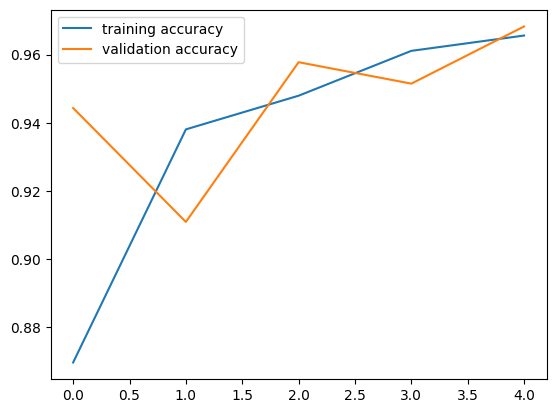

In [8]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()


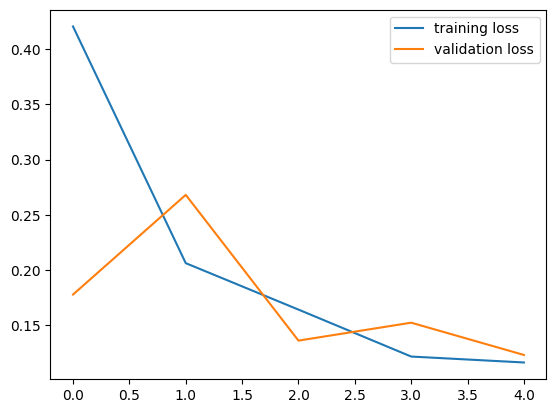

In [9]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()

## CONVNEXT_TINY

In [10]:
conv=ConvNeXtTiny(input_shape=(64,64,3),include_top=False,weights="imagenet")


111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
model=Sequential([
    conv,
    Flatten(),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
])

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
history=model.fit(train_data,epochs=5,validation_data=val_data,batch_size=16)


Epoch 1/5
   2/1182 ━━━━━━━━━━━━━━━━━━━━ 59s 50ms/step - accuracy: 0.1875 - loss: 3.2171    

I0000 00:00:1728988967.913544      77 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_44', 64 bytes spill stores, 64 bytes spill loads



1182/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7549 - loss: 0.7618

I0000 00:00:1728989016.414604      77 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_49', 64 bytes spill stores, 64 bytes spill loads



1182/1182 ━━━━━━━━━━━━━━━━━━━━ 99s 48ms/step - accuracy: 0.7549 - loss: 0.7615 - val_accuracy: 0.9236 - val_loss: 0.2522
Epoch 2/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9377 - loss: 0.2058 - val_accuracy: 0.9481 - val_loss: 0.1658
Epoch 3/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9501 - loss: 0.1592 - val_accuracy: 0.9480 - val_loss: 0.1726
Epoch 4/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9561 - loss: 0.1457 - val_accuracy: 0.9515 - val_loss: 0.1641
Epoch 5/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9603 - loss: 0.1351 - val_accuracy: 0.9443 - val_loss: 0.2005


In [14]:
model.save("ConvTiny_classification.keras")
import pickle
with open('conv_tiny_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

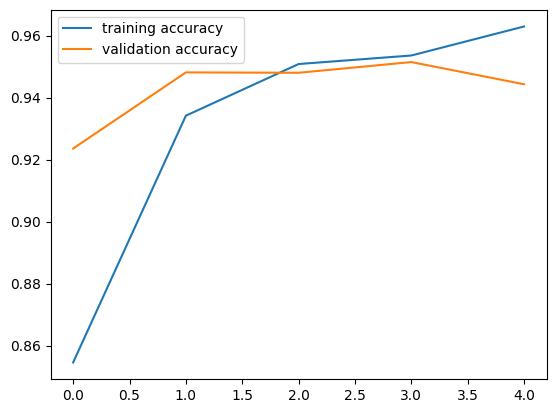

In [15]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()


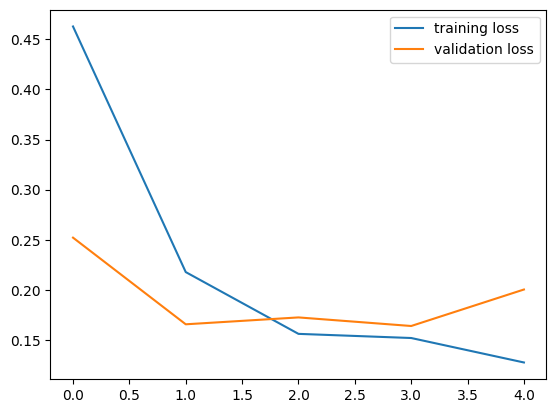

In [16]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()